<a href="https://colab.research.google.com/github/teaoskakac/ProektVnp181149/blob/master/181149-ProektVnP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color = "#0096FF" size = 5>**Целта на овој проект е да се прикажат цените на храната во Турција изминатите 4 години. Со соодветните модели на предвидувања да се направи врз нив benchmark во однос на 10 прехрамбени продукти. </font>

# **Визуелизација и анализа на податочното множество**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

Визуелизација на податочното множество


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/pricesturkey.csv")

dataset



,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,1,2017,5.8700
1,National Average,52,Rice - Retail,5,KG,2,2017,6.0100
2,National Average,52,Rice - Retail,5,KG,3,2017,6.2800
3,National Average,52,Rice - Retail,5,KG,1,2018,7.7321
4,National Average,52,Rice - Retail,5,KG,2,2018,7.7563
...,...,...,...,...,...,...,...,...
1415,National Average,388,Cucumbers,5,KG,6,2021,3.0500
1416,National Average,434,Eggplants,5,KG,6,2021,3.8100
1417,National Average,105,Garlic,5,KG,6,2021,16.7500
1418,National Average,173,Onions,5,KG,6,2021,1.5500


Податочното множество има 1420 редици и 8 колони.


Колоните се:


*   Place - локацијата на која што се однесува цената на храната
*   ProductId - уникатно id за секој од производите
* ProductName - името на производот
* UmId - id за единица мерка
* UmName - името на единица мерка
* Month - месецот на која што се однесува цената
* Year - годината на прикажаната цена на производот
* Price - цената на производот




*Напомена*: податочното множество го изменив за да соодветствува на последните 4 години, односно од 2017 до 2022 година. Затоа што во оригиналното податочно множество имаше податоци од 2012 година.


# **Подготвување на множеството**

Во следниот дел ќе ги прикажам дескриптивните статистики за ова множество.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        1420 non-null   object 
 1   ProductId    1420 non-null   int64  
 2   ProductName  1420 non-null   object 
 3   UmId         1420 non-null   int64  
 4   UmName       1420 non-null   object 
 5   Month        1420 non-null   int64  
 6   Year         1420 non-null   int64  
 7   Price        1420 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 88.9+ KB


In [ ]:
dataset.describe()

,ProductId,UmId,Month,Year,Price
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,240.309859,10.126761,5.836620,2019.349296,19.234684
std,145.492548,17.934600,3.571488,1.485364,26.538603
min,52.000000,5.000000,1.000000,2017.000000,0.409100
25%,112.000000,5.000000,3.000000,2018.000000,4.359300
50%,184.000000,5.000000,5.000000,2019.000000,8.324950
75%,401.000000,5.000000,9.000000,2021.000000,24.357275
max,502.000000,102.000000,12.000000,2022.000000,166.870000


Минималната цена за основните прехрамбени продукти изнесува 0.40, додека максималната е 167. Цените се прикажани во турски лири.

Следно ќе го проверам множеството за NaN вредности, дали постојат и доколку постојат дали има потреба да се избришат.


In [ ]:
missing_values = dataset.isnull().sum()
missing_values_p = missing_values * 100 / len(dataset)
table = pd.concat([missing_values, missing_values_p], axis=1)
table.columns = ["Missing values", "Percentage of Missing values"]
table

,Missing values,Percentage of Missing values
Place,0,0.0
ProductId,0,0.0
ProductName,0,0.0
UmId,0,0.0
UmName,0,0.0
Month,0,0.0
Year,0,0.0
Price,0,0.0


Според табелата, можеме да заклучиме дека не постојат NaN (missing values) вредности.


Во наредниот дел, ќе извршиме графички приказ на податочното множество за подобра репрезентација на целокупните податоци.


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
product = dataset['ProductName'].value_counts(ascending=True)
px.bar(product)

<Axes: title={'center': 'Place'}>

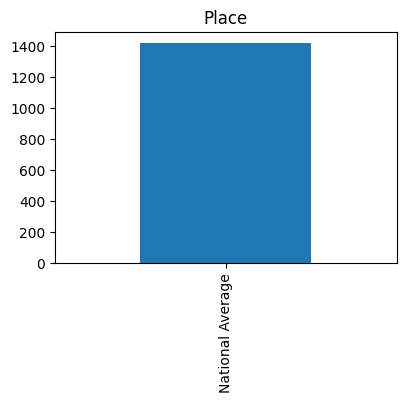

In [ ]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1).set_title('Place'); dataset.Place.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Year'}>

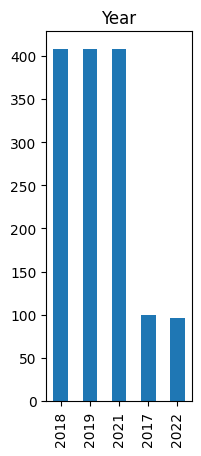

In [ ]:
plt.subplot(1, 3, 3).set_title('Year'); dataset.Year.value_counts().plot(kind = 'bar')

array([[<Axes: title={'center': 'ProductId'}>,
        <Axes: title={'center': 'UmId'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

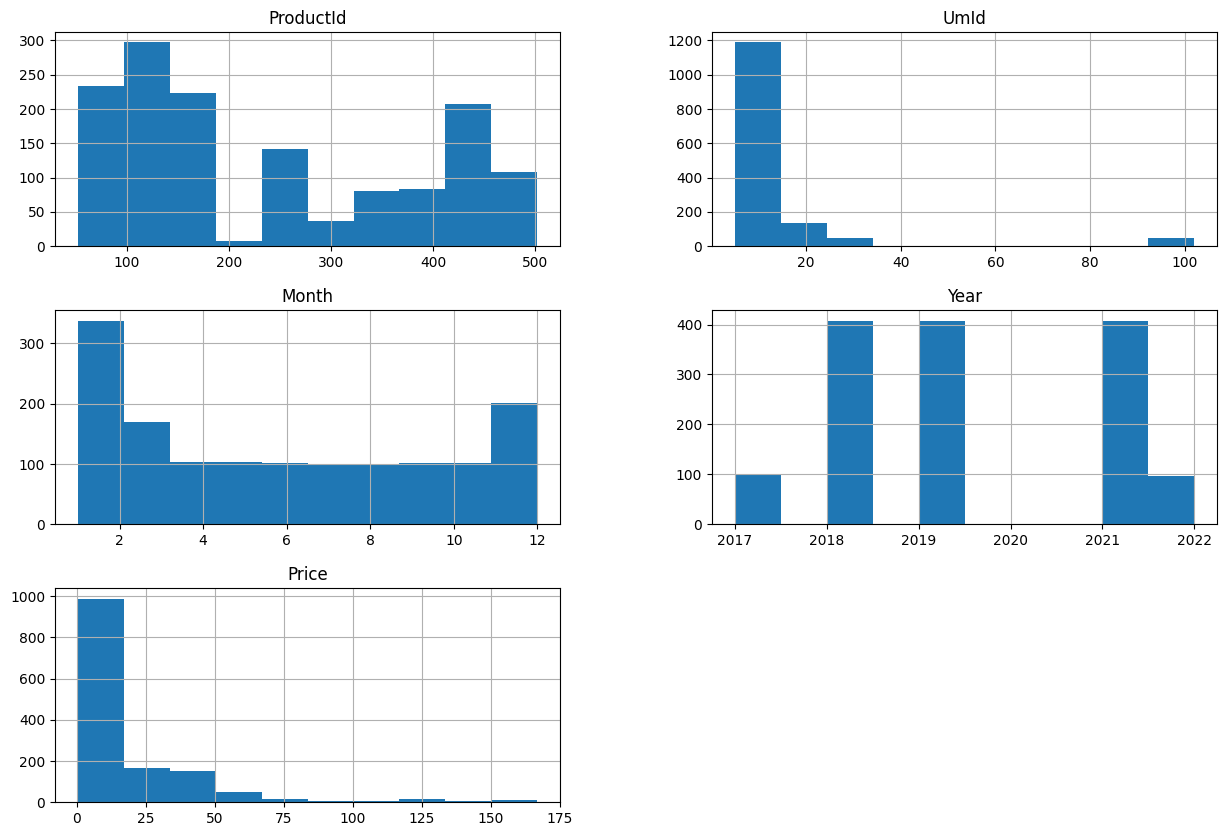

In [ ]:
dataset.hist(column=['Place', 'ProductId', 'ProductName', 'UmId', 'UmName', 'Month', 'Year', 'Price'], figsize=(15, 10))

In [ ]:
px.histogram(dataset,x="ProductId")

# Пре-процесирање на податоците

In [ ]:
dataset.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,1,2017,5.8700
1,National Average,52,Rice - Retail,5,KG,2,2017,6.0100
2,National Average,52,Rice - Retail,5,KG,3,2017,6.2800
3,National Average,52,Rice - Retail,5,KG,1,2018,7.7321
4,National Average,52,Rice - Retail,5,KG,2,2018,7.7563


In [ ]:


x = dataset.drop('Price',axis=True)
y = dataset['Price']



In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)



In [ ]:
data = dataset.copy()

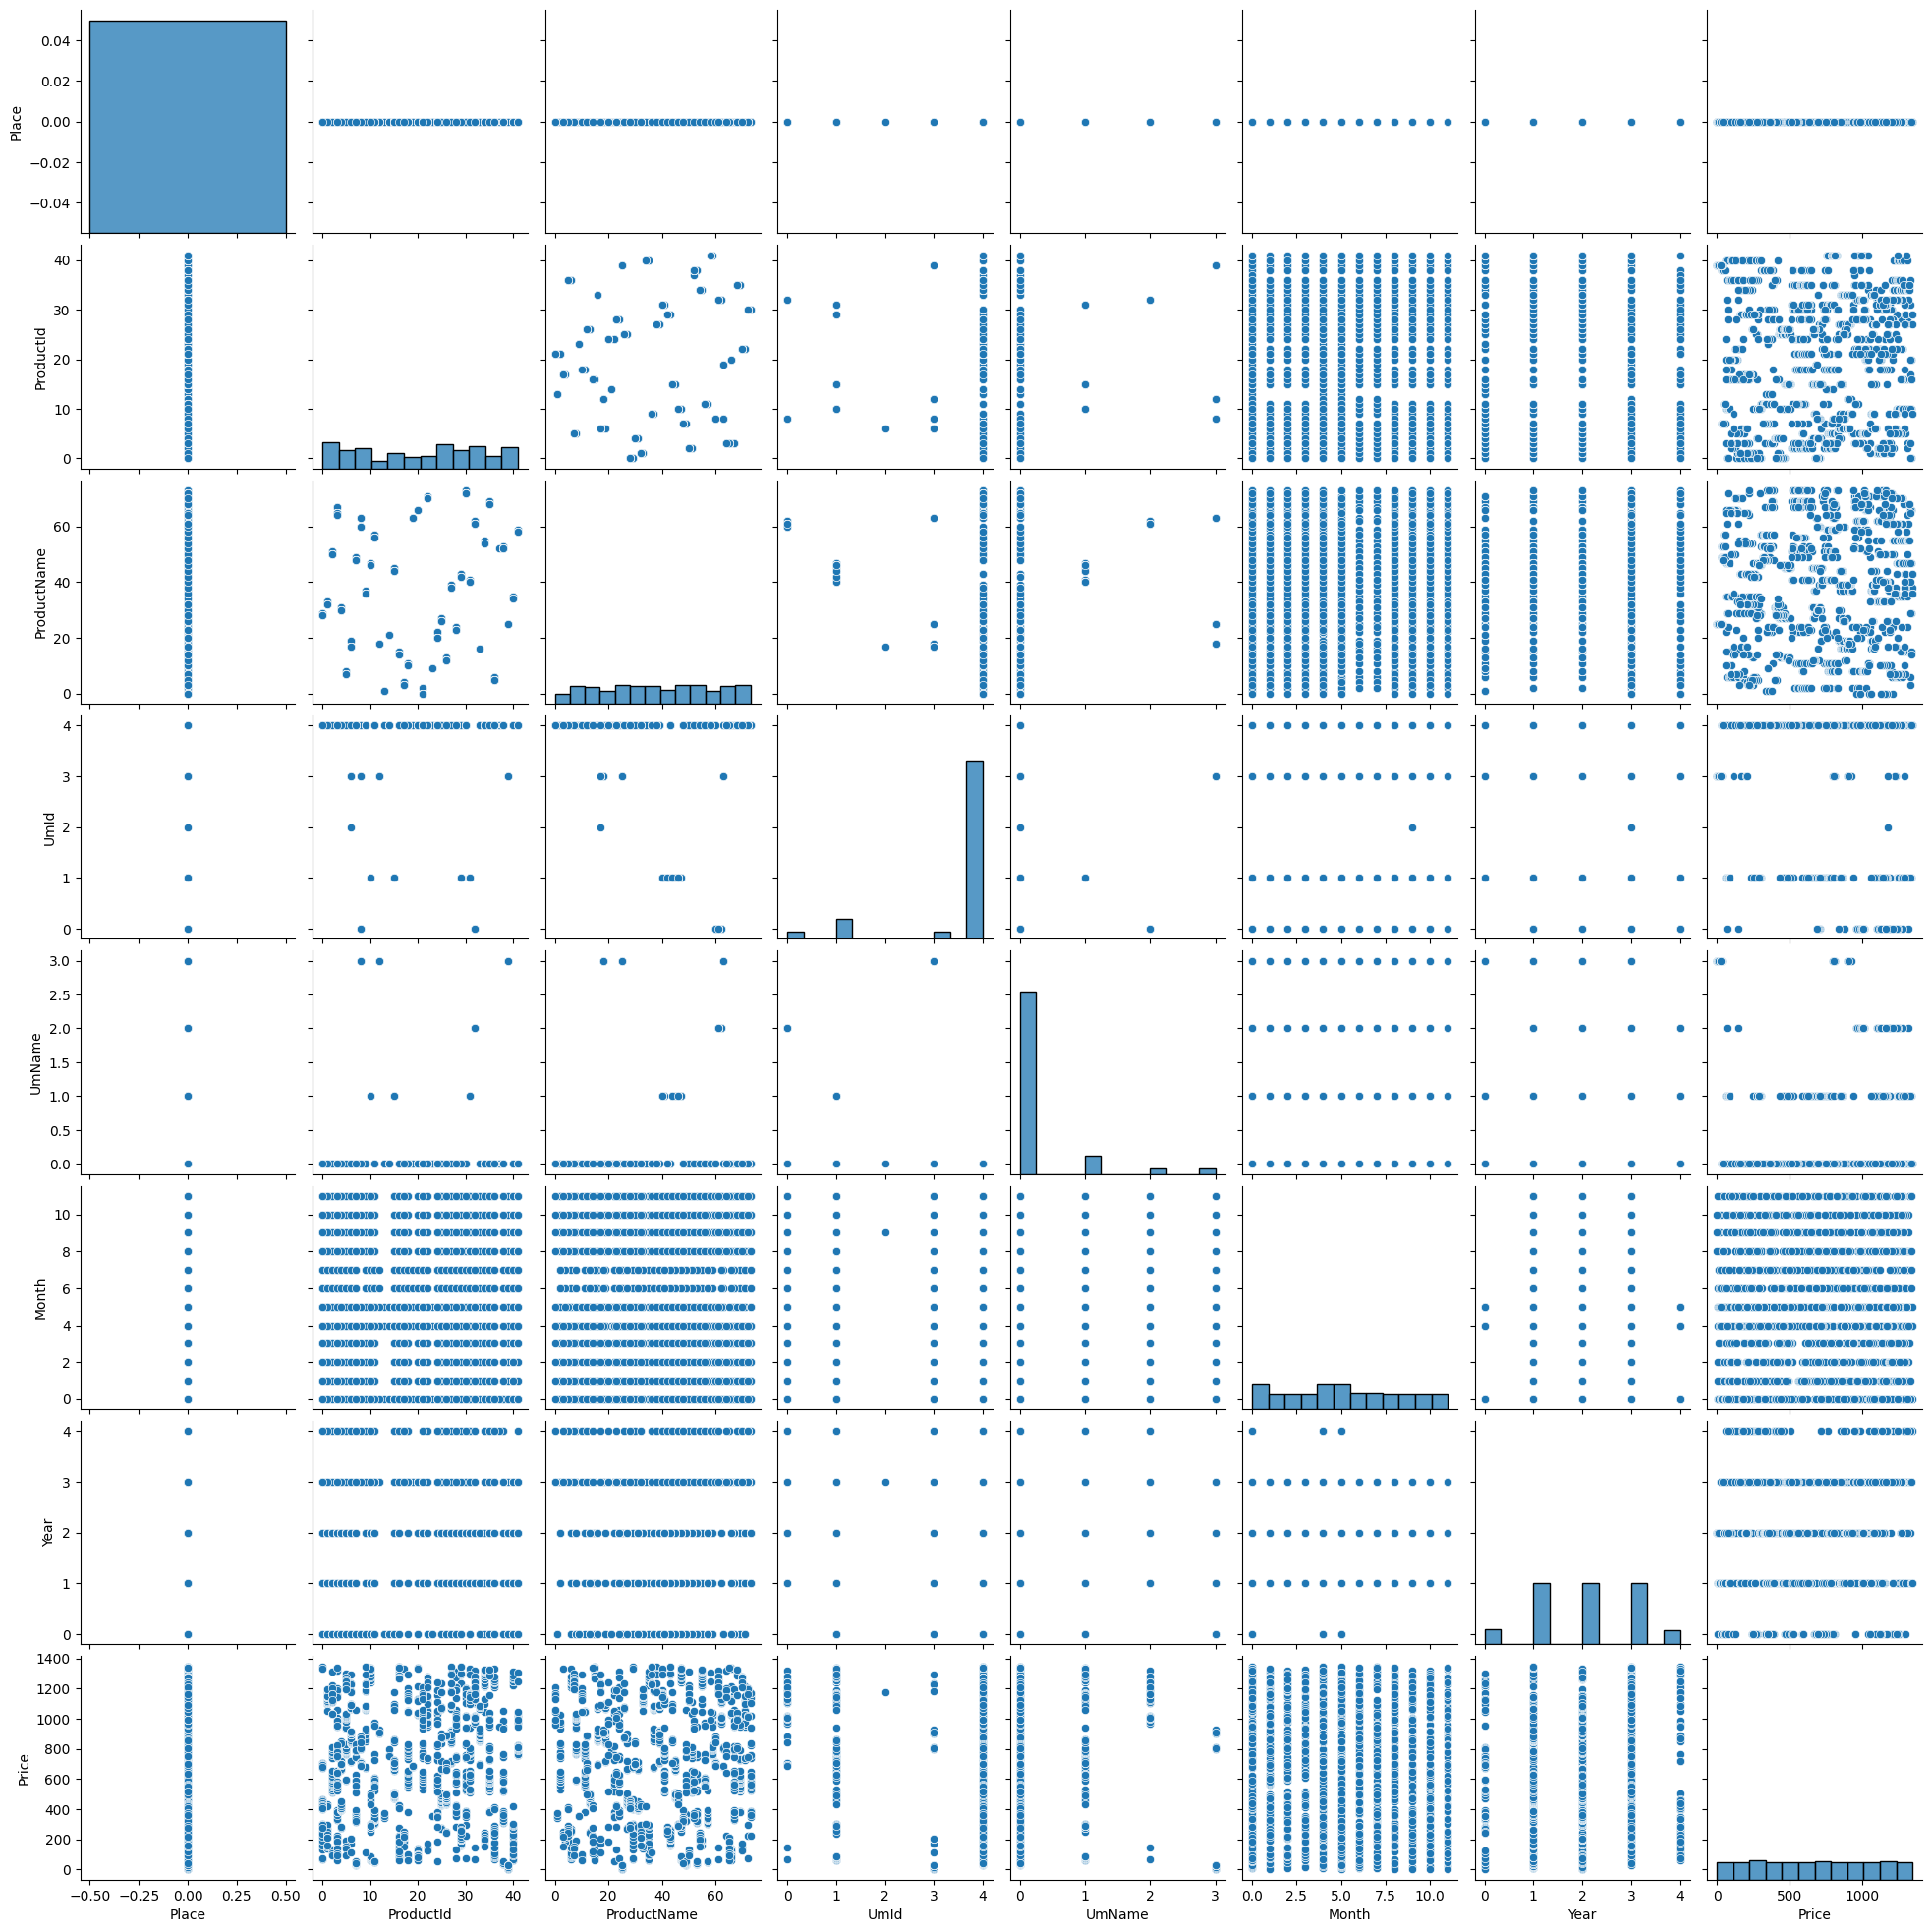

In [ ]:
import seaborn as sns

sns.pairplot(data)

<Axes: >

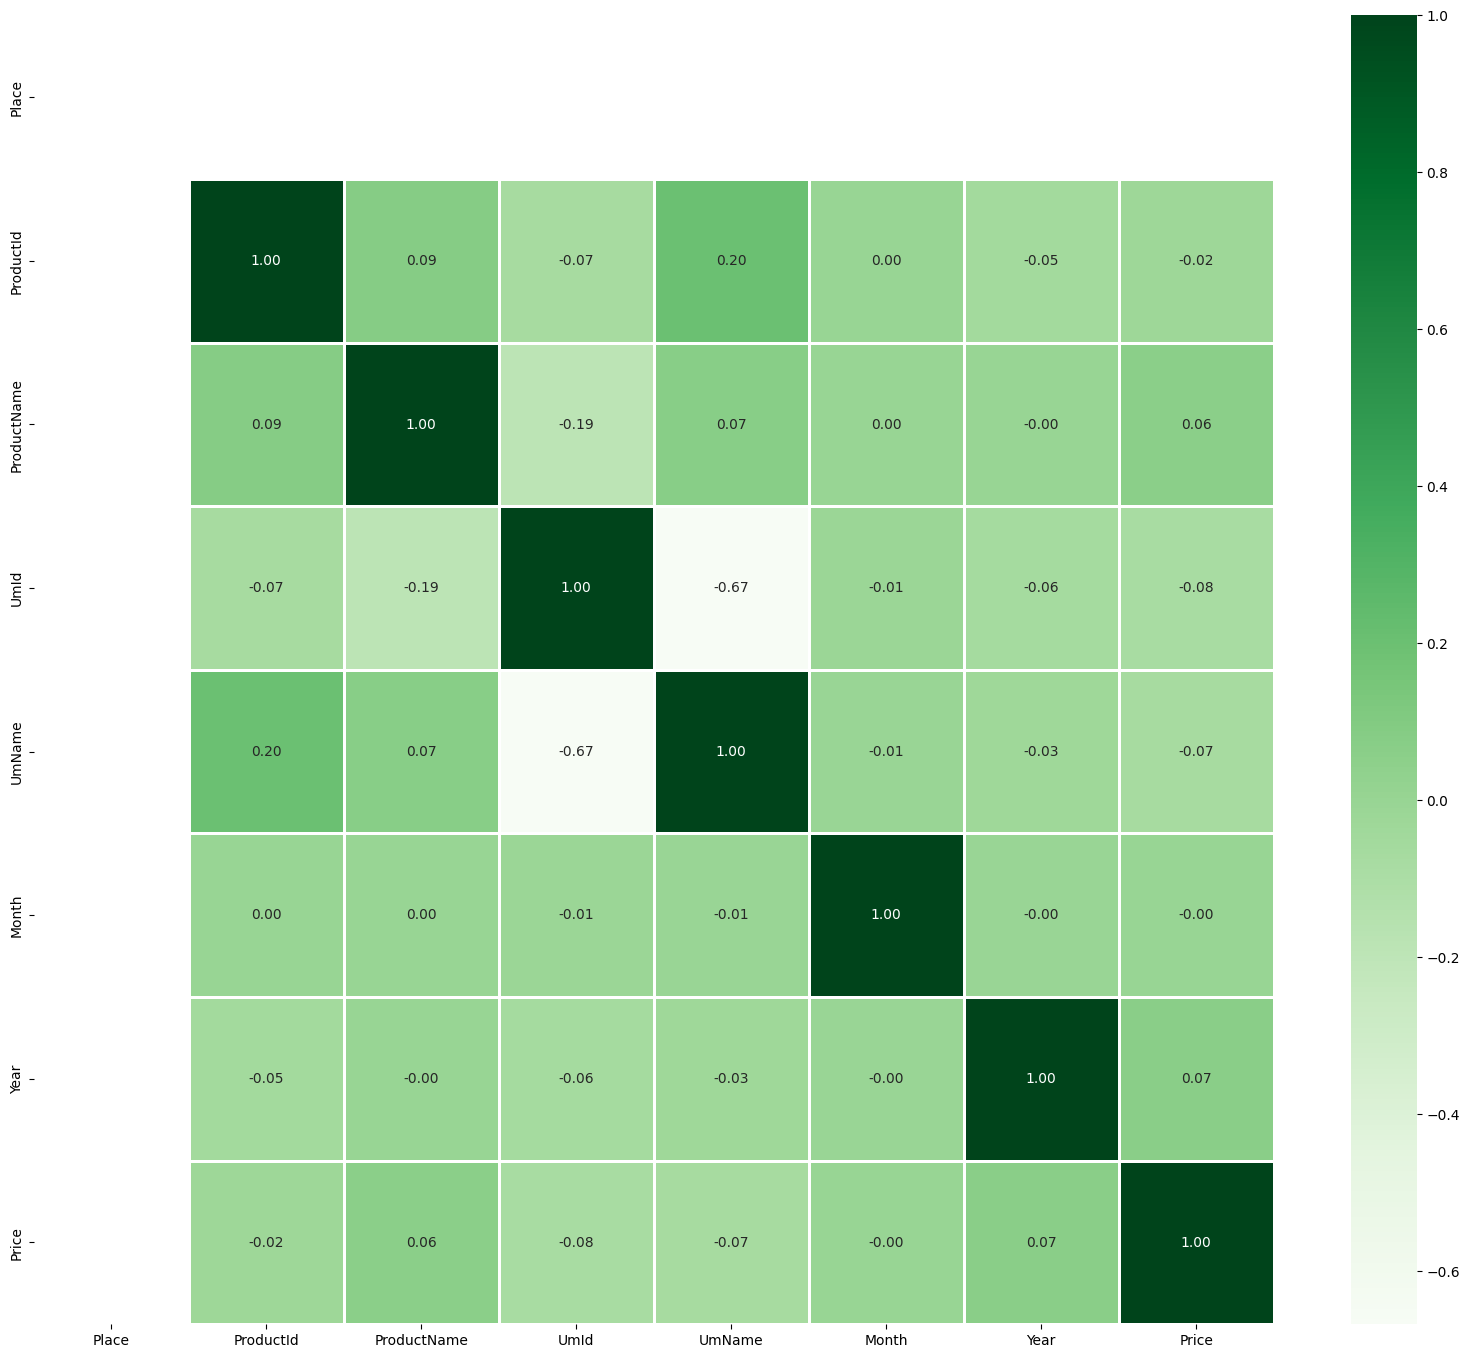

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 17))
sns.heatmap(data.corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=2)


# **Делење на множеството на train и test и користење на различни техники за предвидување.**


**LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['ProductName'], axis=1)
Y = data.ProductName.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
modelLR = LinearRegression().fit(X_train, Y_train)

In [ ]:
type(modelLR)

sklearn.linear_model._base.LinearRegression

In [ ]:
rs = modelLR.score(X_train, Y_train)
print("Score of train values: {:.2f}".format(rs))

Score of train values: 0.05


In [ ]:
rs = modelLR.score(X_train, Y_train)
print("Score of train values: {:.2f}".format(rs))

Score of train values: 0.05


In [ ]:
y_predLR = modelLR.predict(X_test)
y_predLR = y_predLR.round()

In [ ]:
r = modelLR.score(X_test, y_predLR)
print("Score of predicted values: {:.2f}".format(r))

Score of predicted values: 1.00


In [ ]:
df = pd.concat([dataset1, dataset[['Month', 'Year', 'Price']]], axis=1)
df

,Place_National Average,ProductName_Apples,ProductName_Apples (red) - Retail,ProductName_Apples - Retail,ProductName_Bananas,ProductName_Bananas - Retail,ProductName_Beans (white),ProductName_Beans (white) - Retail,ProductName_Bread (common),ProductName_Bread (common) - Retail,...,ProductName_Yogurt - Retail,ProductName_Zucchini,ProductName_Zucchini - Retail,UmName_KG,UmName_L,UmName_Package,UmName_Unit,Month,Year,Price
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,2017,5.8700
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,2017,6.0100
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,2017,6.2800
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,2018,7.7321
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,2018,7.7563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,6,2021,3.0500
1416,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,6,2021,3.8100
1417,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,6,2021,16.7500
1418,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,6,2021,1.5500


In [ ]:
x = df3.drop('Price',axis=True)
y = df3['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit_transform(x_train)
ms.transform(x_test)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.81818182,
        0.4       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.36363636,
        0.4       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.81818182,
        0.4       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.72727273,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.45454545,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.4       ]])

In [ ]:
x_train.shape, x_test.shape

((1136, 81), (284, 81))

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

lin_acc=r2_score(y_test,lin_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,lin_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,lin_reg.predict(x_test))*100))




Train Set Accuracy:96.5993607459347
Test Set Accuracy:97.43557102694186


Тука може да се заклучи дека со користење на Линеарна регресија како техника за предвидување, воочив дека овој тест дава добри резултати, но ќе тестираме повеќе.

**LogisticRegression**


In [ ]:
X = data.drop(['Price'], axis=1)
Y = data.Price.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLog = LogisticRegression(max_iter=10000)
modelLog.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_predLog = modelLog.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
rlog = accuracy_score(Y_test, y_predLog)
print('Accuracy Logistic Regression: {:.2f}'.format(rlog))

Accuracy Logistic Regression: 0.01


In [ ]:
X = data.drop(['ProductName'], axis=1)
Y = data.ProductName.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Како што може да забележиме во однос на претходната техника со Линеарна регресија, гледаме дека овој тест ни дава послаби резултати, што значи дека не е најдобриот.

Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

In [ ]:
print("Accuracy:",regressor.score(X_test, Y_test))

Accuracy: 0.9917261830056951


# **Заклучок**


Ќе креирам табела која што ќе ми ги прикаже резултатите од извршените модели на предвидување.


In [ ]:

models = pd.DataFrame({
    'Model': ['Linear regression','Decision tree regression','LogisticRegression'],
    'Score': [ lin_acc, d_acc, rlog]
})
models.sort_values(by = 'Score', ascending = False)



,Model,Score
1,Decision tree regression,0.995036
0,Linear regression,0.974356
2,LogisticRegression,0.010563


Како што може да се воочи, најдобриот модел е Decision Tree Regression, а него го прати и моделот на Линеарна Регресија, додека најлошиот е LogisticRegression


Графички приказ:


In [ ]:
px.bar(models,x='Model',y='Score',color='Model')